# Second Programming Assignment

The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1-1.4 and 2.1-2.20. After each task description there is an answer cell for your code or text. For coding tasks they look like this:
```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the miug22 folder.
- Do not override the original files in the miug22 folder.
- For every plot make sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted.

#### Date of submission: June 29, 2022, 23:55 hrs (GMT+2)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## System of Equations
We create the matrices $\mathbf{A_1}$ and $\mathbf{A_2}$. 

(Remark: The @ - operator is the matrix product in Python3. You can also use `np.dot(X,Y)` for the matrix product of `X` and `Y`.)

We then create the follwing systems of equations: $\mathbf{A_1\cdot x} = \mathbf{b_1}$ and $\mathbf{A_2\cdot x} = \mathbf{b_2}$.

Note: We use a random seed (same thing as a random state) to always get the same numbers. This task would also work without a seed, but we want every student to have the same 'random' values.

In [2]:
np.random.seed(306)
A1 = np.random.randn(5,3) @ np.random.randn(3,4)
A2 = np.random.randn(5,4)
x = np.random.randn(4,1)
b1 = A1@x
b2 = A2@x + np.random.randn(5,1)

**Task 1.1**

Solve the previously generated linear systems of equations $\mathbf{A_i \cdot x} = \mathbf{b_i}, i = 1, 2$ by computing the Pseudo-Inverse $\mathbf{A}_i^{\dagger} =
    (\mathbf{A}_i^T\mathbf{A}_i)^{-1}\mathbf{A}_i^T$ in the form $\mathbf{\tilde{x}}_i = \mathbf{A}_i^{\dagger}\cdot \mathbf{b}_i$. Save the results in `x1_til` and `x2_til`.
    
Note: Use `np.linalg.inv()` for $^{-1}$.

In [3]:
# YOUR CODE HERE

x1_til = np.linalg.inv(A1.T@A1)@A1.T@b1
x2_til = np.linalg.inv(A2.T@A2)@A2.T@b2

In [4]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(str(x1_til[2]).encode()).hexdigest() == '36d4e9f6482485a4ae78a75f9ecf1b90'
assert hashlib.md5(str(x2_til[3]).encode()).hexdigest() == '4de6139aaa0325d038656ec2e41d0c6d'
### END TESTS

We then calculate the mean squared error (MSE) between $\mathbf{x}$ and $\mathbf{\tilde{x}}_1$, as well as $\mathbf{x}$ and $\mathbf{\tilde{x}_2}$.

In [5]:
from sklearn.metrics import mean_squared_error
mse_x1_til = mean_squared_error(x, x1_til)
mse_x2_til = mean_squared_error(x, x2_til)
print('MSE of x1_til: %f' % mse_x1_til)
print('MSE of x2_til: %f' % mse_x2_til)

MSE of x1_til: 1.873799
MSE of x2_til: 0.503434


**Task 1.2**

Why is there a difference between $\mathbf{x}$ and $\mathbf{\tilde{x}}_1$ and also between $\mathbf{x}$ and $\mathbf{\tilde{x}}_2$? Which difference is higher and why?

'a': $\mathbf{\tilde{x}}_1$ has the bigger error but this is just because of the numbers generated for this specific random seed

'b': $\mathbf{\tilde{x}}_2$ has the bigger error because we added noise to vector $b_2$

'c': $\mathbf{\tilde{x}}_1$ has the bigger error because we’re inverting a matrix without full rank

'd': $\mathbf{\tilde{x}}_2$ has the bigger error because we’re inverting a matrix with linear dependencies

*Use a variable* `x12` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x12 = 'e'`*.
There is only one correct answer.* 

In [6]:
# YOUR CODE HERE
'''
MSE 크다 == Error big
x12= 'd'
'''

x12= 'c'

**Task 1.3**

Solve the linear systems of equations using a pseudo-inverse computed in Python by Numpy’s linear algebra function `np.linalg.pinv()`. Calculate the MSE errors `mse_x1_pinv` and `mse_x2_pinv` similar to the cells above. 

In [7]:
# YOUR CODE HERE
x1_pinv = np.linalg.pinv(A1) @ b1
x2_pinv = np.linalg.pinv(A2) @ b2

mse_x1_pinv = mean_squared_error(x, x1_pinv)
mse_x2_pinv = mean_squared_error(x, x2_pinv)


print('MSE of x1_pinv: %f' % mse_x1_pinv)
print('MSE of x2_pinv: %f' % mse_x2_pinv)

MSE of x1_pinv: 0.101004
MSE of x2_pinv: 0.503434


In [8]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(str(mse_x1_pinv).encode()).hexdigest() == '739f6912e14eff3b9d7241abb3fbd546'
assert hashlib.md5(str(mse_x2_pinv).encode()).hexdigest() == '4cdec592285cdd19dfc84f49a9bbbf2b'
### END TESTS

**Task 1.4**

Where do you get different errors when using `np.linalg.pinv()` and why?

'a': Both errors get smaller, as `np.linalg.pinv()` does a better job at inverting matrices with linear dependencies

'b': The error in `x1_pinv` gets smaller. The error in `x2_pinv` does not change if a Moore-Penrose-pseudoinverse is used.

'c': The error in `x2_pinv` gets smaller. The error in `x1_pinv` does not change if a Moore-Penrose-pseudoinverse is used.

'd': Neither errors change, as the Moore-Penrose-pseudoinverse does exactly the same as the simple pseudoinverse we calculated before.

*Use a variable* `x14` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x14 = 'e'`*.
There is only one correct answer.* 

In [9]:
# YOUR CODE HERE
x14='b'

##  Data Inspection
The provided dataset is a fictional one that contains different subject scores for students. It contains information such as their race / ethnicity as well as information about their parents. 

**Task 2.1**

Start of by reading the dataset which is provided as a csv file called __'StudentsPerformance.csv'__. Load the data as a pandas dataframe called __data__. 

In [10]:
# YOUR CODE HERE
data = pd.read_csv('StudentsPerformance.csv')
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,bachelor's degree,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,bachelor's degree,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,bachelor's degree,standard,completed,68,78,77


In [11]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(data.iloc[500,6]).hexdigest() == 'd5115594e2832e7a535e9e09d5931885'
### END TESTS

**Task 2.2**

Look at the columns in the datasets and the data types. Also print out the first few rows of the dataframe. 

In [12]:
# YOUR CODE HERE
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,bachelor's degree,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,bachelor's degree,standard,none,76,78,75


How many of the features in the dataset are already numeric values?

'a': 0

'b': 1

'c': 2

'd': 3

*Use a variable* `x22` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x22='e'`*.
There is only one correct answer.* 

In [13]:
# YOUR CODE HERE
x22 = 'd'

**Task 2.3**

How many of the first 5 students have completed the test preparation course?

'a': 0

'b': 1

'c': 2

'd': 3

*Use a variable* `x32` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x23='e'`*.
There is only one correct answer.* 

In [14]:
# YOUR CODE HERE
x23 = 'b'

**Task 2.4**

We provide you with a `print_unique` function. Call the `print_unique` function with a list of categorical column names (list of names of the columns of all the categorical features in the dataset) and the associated data frame. You should then be able to see all the unique categories for each column. We've provided an exemplary list. You have to replace the column names (`first_feature_name`,...) with the correct ones.

In [15]:
def print_unique(data, col_names):
    for col in col_names:
        print(col, ': ', data[col].unique())

In [16]:
columns = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course', 'math score', 'reading score', 'writing score']

# YOUR CODE HERE
print(data,columns)

     gender race/ethnicity parental level of education         lunch   
0    female        group B           bachelor's degree      standard  \
1    female        group C           bachelor's degree      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C           bachelor's degree      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D           bachelor's degree      standard   
999  female        group D           bachelor's degree  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none          72             72         

In [17]:
binary_count = 0

# Iterate through each categorical column
for col in columns:
    unique_values = data[col].unique()
    if len(unique_values) == 2:  # Check if only two unique values are present
        binary_count += 1

print("Number of binary categorical features:", binary_count)

Number of binary categorical features: 3


How many of the categorical features are binary?

'a': 0

'b': 1

'c': 2

'd': 3

*Use a variable* `x24` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x24='e'`*.
There is only one correct answer.* 

In [18]:
# YOUR CODE HERE
x24 = 'd'
# gender, lunch, test preparation course

We will start by focusing on the reading score. 

**Task 2.5**

Plot the kernel density estimation of the variable `reading score` using seaborn(`sns`). Use the values from `gender` as classes and display them as hue. Make sure your plot has a title, a legend and labels on the axes.

*Don't change the first line of code and don't add any additional `plt.figure()`. Your plot must stay assigned to the variable `fig_25`. It is used to check if your plot is correct.*

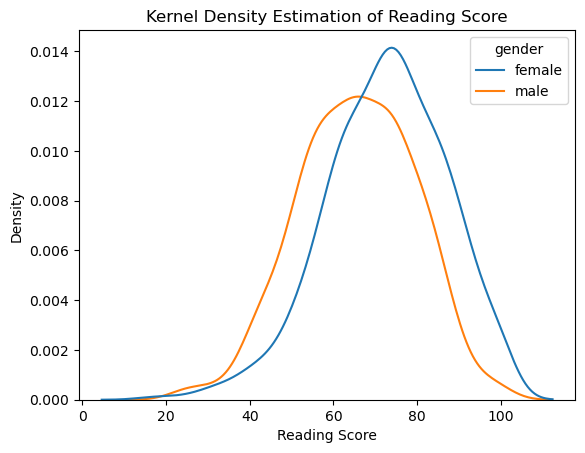

In [19]:
fig_25 = plt.figure()

# YOUR CODE HERE
# Plot KDE with gender as hue
sns.kdeplot(data=data, x='reading score', hue='gender')

# Set title and labels
plt.title("Kernel Density Estimation of Reading Score")
plt.xlabel("Reading Score")
plt.ylabel("Density")
#plt.legend(data['gender'])

plt.show()

**Task 2.6**

Plot the kernel density estimation of the variable `reading score` using seaborn(`sns`). Use the values from `race/ethnicity` as classes and display them as hue. Make sure your plot has a title, a legend and labels on the axes.

*Don't change the first line of code and don't add any additional `plt.figure()`. Your plot must stay assigned to the variable `fig_26`. It is used to check if your plot is correct.*

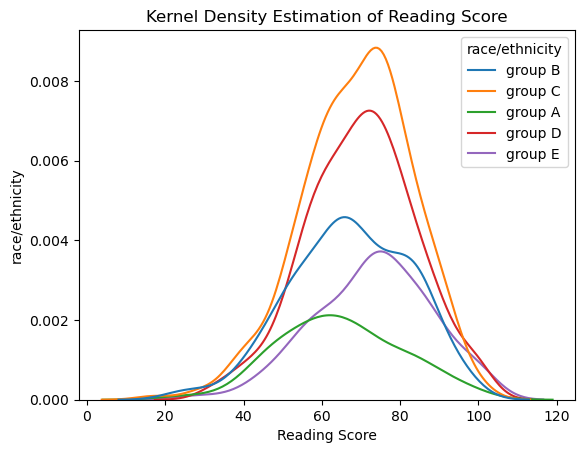

In [20]:
fig_26 = plt.figure()

# Plot KDE with gender as hue
sns.kdeplot(data=data, x='reading score', hue='race/ethnicity')

# Set title and labels
plt.title("Kernel Density Estimation of Reading Score")
plt.xlabel("Reading Score")
plt.ylabel("race/ethnicity")
#plt.legend(data['race/ethnicity'])


plt.show()

## Data Preprocessing

**Task 2.7**

Create a feature matrix called __X_all__ that does not include the column `reading score`. Also create the vector __y__.

In [21]:
# YOUR CODE HERE
X_all = data.drop('reading score', axis=1)
y = data['reading score']

In [22]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(str(y[701]).encode()).hexdigest() == '735b90b4568125ed6c3f678819b6e058'
assert hashlib.md5(str(X_all.iloc[301,3]).encode()).hexdigest() == 'f2a9665246ed76059d0b72bec387cef0'
assert hashlib.md5(str(len(X_all.columns)).encode()).hexdigest() == '8f14e45fceea167a5a36dedd4bea2543'
### END TESTS

**Task 2.8**

In the cell below we use the dictionary `replacements` to encode the feature `parental level of education`. Why don't we just use the label encoder?

'a': The label encoder would assign numbers in alphabetical order.

'b': The label encoder would unnecessarily enlarge the dataset.

'c': The “replace” function is more computationally efficient than the label encoder.

'd': The label encoder cannot handle special characters like apostrophes.

*Use a variable* `x28` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x28 = 'e'`*.
There is only one correct answer.* 

In [23]:
X_lvl = X_all[['parental level of education']]
replacements = {"high school": 0, "associate's degree":1, "bachelor's degree": 2, "master's degree": 3}
X_lvl = X_lvl.replace(replacements)

In [24]:
# YOUR CODE HERE
x28 = 'a'

**Task 2.9**

There are 4 other categorical columns that have not been encoded. 3 of them are binary, create the dataframe `X_binary` that only contains those features. Use the sklearn label encoder to encode each binary categorical feature. Print the first few samples of `X_binary`. 

Hint: The label encoder can take one column at a time.

In [25]:
from sklearn.preprocessing import LabelEncoder

# YOUR CODE HERE
binary_columns = ['gender', 'lunch', 'test preparation course']
X_binary = data[binary_columns].copy()
label_encoder = LabelEncoder()
for column in X_binary.columns:
    X_binary[column] = label_encoder.fit_transform(X_binary[column])
    

print(X_binary.head())

   gender  lunch  test preparation course
0       0      1                        1
1       0      1                        0
2       0      1                        1
3       1      0                        1
4       1      1                        1


In [26]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(str(sum(X_binary.sum())).encode()).hexdigest() == '7eb7eabbe9bd03c2fc99881d04da9cbd'
### END TESTS

**Task 2.10**

The next cell will encode the `race/ethnicity` column. A so-called one-hot encoding is used, instead of a label encoder. Which of the following is *not* a reason for this choice of encoding?

'a': Because `race/ethnicity` is a categorical variable.

'b': Because `race/ethnicity` is a nominal variable.

'c': Because `race/ethnicity` does not have a natural ordering.

'd': To improve the performance of the algorithm.

*Use a variable* `x210` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x210 = 'e'`*.
There is only one correct answer.* 

In [27]:
X_race = X_all[['race/ethnicity']]
X_race = pd.get_dummies(X_race, prefix=['race'])
X_race.head()

,race_group A,race_group B,race_group C,race_group D,race_group E
0,False,True,False,False,False
1,False,False,True,False,False
2,False,True,False,False,False
3,True,False,False,False,False
4,False,False,True,False,False


In [28]:
# YOUR CODE HERE
x210 = 'd'
###### 몰라

Now that we've encoded all the categorical variables. We combine all our features in the `X_encoded` dataframe.

In [29]:
X_encoded = pd.concat((X_lvl, X_binary, X_race, X_all[['writing score', 'math score']]), axis=1)
X_encoded.head()

,parental level of education,gender,lunch,test preparation course,race_group A,race_group B,race_group C,race_group D,race_group E,writing score,math score
0,2,0,1,1,False,True,False,False,False,74,72
1,2,0,1,0,False,False,True,False,False,88,69
2,3,0,1,1,False,True,False,False,False,93,90
3,1,1,0,1,True,False,False,False,False,44,47
4,2,1,1,1,False,False,True,False,False,75,76


**Task 2.11**

Split your data in training and test set. Use 25% of the data in the test set and the random state 311.

In [30]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.25, random_state=311)

In [31]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(str(y_train.size).encode()).hexdigest() == 'b137fdd1f79d56c7edf3365fea7520f2'
### END TESTS

The next cell generates `y_train_norm` and `y_test_norm` by using the standard scaler.

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

y_train_norm = scaler.fit_transform(y_train.values.reshape(-1,1))
y_test_norm = scaler.transform(y_test.values.reshape(-1,1))

**Task 2.12**

Complete the code below that receives the train and test feature matrices and centers and scales them with Sklearn's StandardScaler. We create a pandas dataframe called `X_train_norm` and `X_test_norm` for you. Make sure to fill the values for these dataframes. Print the first few samples of your `X_train_norm`.

Note: Use dataframe.loc[:] to replace all values in dataframes.

In [33]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()
# YOUR CODE HERE

# Apply standardization to the feature matrices using dataframe.loc[:]
X_train_norm = pd.DataFrame(scaler.fit_transform(X_train.loc[:]), columns=X_train.columns)
X_test_norm = pd.DataFrame(scaler.transform(X_test.loc[:]), columns=X_test.columns)



In [34]:
### BEGIN TESTS
import hashlib
assert np.isclose(np.mean(X_train_norm.values), 0)
assert np.isclose(np.mean(X_test_norm.values), -0.006976597527318279, atol=1e-03)
### END TESTS

## Linear regression

**Task 2.13**

Complete a function that creates a linear regression model. Fit it on the training data and predict the label vector for the test values. Return the predicted values!

In [35]:
from sklearn.linear_model import LinearRegression
def linear_regression(X_train_input, X_test_input, y_train_input):
    # YOUR CODE HERE
    model = LinearRegression()
    model.fit(X_train_input, y_train_input)
    result = model.predict(X_test_input)
    return result

**Task 2.14**


In the following create a new dataframe called X_train_norm_red and X_test_norm_red which includes all the features except any scores.

In [36]:
# YOUR CODE HERE
X_train_norm_red = X_train_norm.drop(['math score', 'writing score'], axis=1)
X_test_norm_red = X_test_norm.drop(['math score', 'writing score'], axis=1)

In [37]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(str(X_test_norm_red.size).encode()).hexdigest() == 'a07c2f3b3b907aaf8436a26c6d77f0a2'
### END TESTS

**Task 2.15**

Call the regression function from task 2.13 with your new variables X_train_norm_red, X_test_norm_red. Save the result in the variable __y_pred_red__.

In [38]:
# YOUR CODE HERE
y_pred_red = linear_regression(X_train_norm_red, X_test_norm_red, y_train_norm)

In [39]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(str(y_pred_red[105]).encode()).hexdigest() == '3ffc78a012fdb8dd088c819a321fc069'
### END TESTS

**Task 2.16**

Plot the predicted values against the actual values. Add the ideal line. Make sure your plot has a title and labels on the axes.

*Don't change the first line of code and don't add any additional `plt.figure()`. Your plot must stay assigned to the variable `fig_216`. It is used to check if your plot is correct.*

Hint: In this case it is simpler to use `plt.scatter` instead of `sns.scatterplot`. It is still possible to use `sns.scatterplot` but you either have to create a dataframe from the input arrays or correct the dimensions of the input arrays.

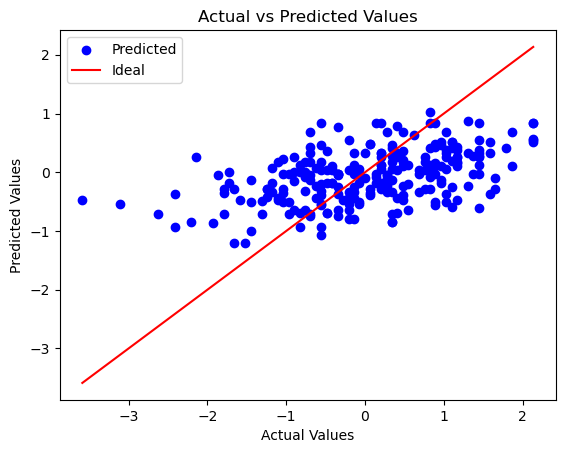

In [40]:
fig_216 = plt.figure()

# YOUR CODE HERE
plt.scatter(y_test_norm, y_pred_red, color='blue', label='Predicted')

# limits 
# y_test_norm & y_pred_red both use!

lower_limit = min(min(y_test_norm), min(y_pred_red))
upper_limit = max(max(y_test_norm), max(y_pred_red))

# orig
#min_val = min(y_test_norm)
#max_val = max(y_test_norm)
#plt.plot([min_val, max_val], [min_val, max_val], color='red', label='Ideal')


# add
plt.plot([lower_limit, upper_limit], [lower_limit, upper_limit], color='red', label='Ideal')

# orig
#plt.plot([0, 100], [0, 100], color='red', label='Ideal')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()


plt.show()

**Task 2.17**

In the following cell create the dataframes* `x_train_writ` and `x_test_writ` that only include the writing score as a feature. 

<sub>*to be more precise: dataframes with a single column are called series in pandas<sub>

In [41]:
# YOUR CODE HERE
x_train_writ = pd.DataFrame(X_train_norm['writing score'])
x_test_writ = pd.DataFrame(X_test_norm['writing score'])



In [42]:
y_pred = linear_regression(x_train_writ.values.reshape(-1,1), x_test_writ.values.reshape(-1,1), y_train_norm)

In [43]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(str(y_pred[123]).encode()).hexdigest() == '493892e9f9d3c8e6369e3df6476ed019'
### END TESTS

**Task 2.18**

Plot the predicted values against the actual values. Add the ideal line. Make sure your plot has a title and labels on the axes.

*Don't change the first line of code and don't add any additional `plt.figure()`. Your plot must stay assigned to the variable `fig_218`. It is used to check if your plot is correct.*

Hint: In this case it is simpler to use `plt.scatter` instead of `sns.scatterplot`. It is still possible to use `sns.scatterplot` but you either have to create a dataframe from the input arrays or correct the dimensions of the input arrays.

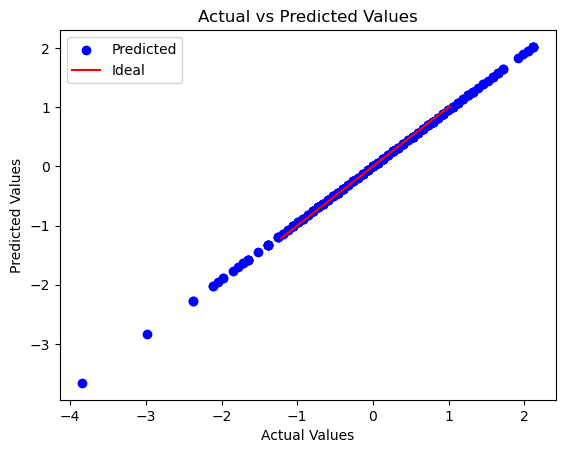

In [44]:
fig_218 = plt.figure()

# YOUR CODE HERE
plt.scatter(x_test_writ, y_pred, color='blue', label='Predicted')

# limits
lower_limit = min(y_pred_red)
upper_limit = max(y_pred_red)


plt.plot([lower_limit, upper_limit], [lower_limit, upper_limit], color='red', label='Ideal')

plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()

plt.show()

**Task 2.19**

Compare the model from tasks 2.15 and 2.16 with the one from tasks 2.17 and 2.18. Which one performs better and why?

'a': The model from 2.17/2.18 performs better because feature and target variable are closely related.

'b': The model from 2.17/2.18 performs better because it has fewer features.

'c': The model from 2.15/2.16 performs better because it has more features.

'd': The model from 2.15/2.16 performs better because scores are dropped, removing linear dependencies.

*Use a variable* `x219` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x219 = 'e'`*.
There is only one correct answer.* 

In [45]:
# YOUR CODE HERE
x219 = 'a'

## SVD

**Task 2.20**

Use a singular value decomposition to calculate U, s and VT from `X_train_norm`.

In [46]:
# YOUR CODE HERE
U, s, VT = np.linalg.svd(X_train_norm)

In [47]:
### BEGIN TESTS
import hashlib
assert hashlib.md5(str(s[5]).encode()).hexdigest() == '80e33c58f819b5dc47a0b61fd425b16e'
### END TESTS

**Task 2.21**

Plot the magnitude of the singular values you calculated in the previous step. Make sure your plot has a title and labels on the axes.

*Don't change the first line of code and don't add any additional `plt.figure()`. Your plot must stay assigned to the variable `fig_221`. It is used to check if your plot is correct.*

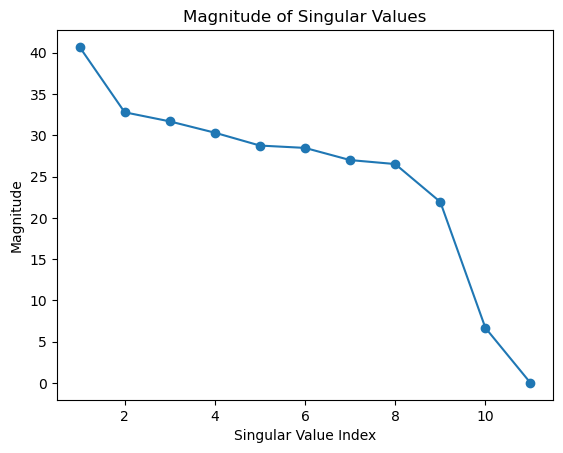

In [48]:
fig_221 = plt.figure()

# YOUR CODE HERE
plt.plot(range(1, len(s) + 1), s, marker='o')
plt.xlabel('Singular Value Index')
plt.ylabel('Magnitude')
plt.title('Magnitude of Singular Values')

plt.show()

**Task 2.22**

Plot the percentage of explained variance (cumulative singular values) by the number of singular values. Make sure your plot has a title and labels on the axes.

*Don't change the first line of code and don't add any additional `plt.figure()`. Your plot must stay assigned to the variable `fig_222`. It is used to check if your plot is correct.*

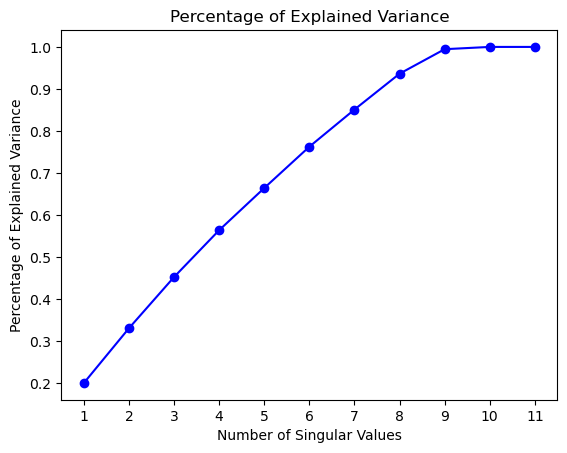

In [49]:
fig_222 = plt.figure()

# YOUR CODE HERE
explained_variance = np.cumsum(s**2) / np.sum(s**2)
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', color='blue')
plt.title('Percentage of Explained Variance')
plt.xlabel('Number of Singular Values')
plt.ylabel('Percentage of Explained Variance')
plt.xticks(range(1, len(explained_variance) + 1))

plt.show()